## SLUMP TEST PREDICTION

Hello! I am Tamer Meliköylü. I am a Senior Civil Engineer and also an AI and Machine Learning Enthusiast. In this notebook I will use Concrete Slump Test Data from https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test . 
Note: This file is a .data file, i converted it to a csv.

Slump is a measurement of the workability or consistency of concrete. In other words, it measures how easy the concrete is to push, mold and smooth out. It is a cruical thing when pouring concrete in a construction becouse if the slump is too low, workers will create a problem for sure. Concrete is a highly complex material. The slump flow of concrete is not only determined by the water content, but that is also influenced by other concrete ingredients. Let's try to predict the slump of concrete by it's ingredients.

In [3]:
# Lets start with importing some libraries
from IPython.display import display
import numpy as np
import pandas as pd
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt

from datetime import datetime
from scipy.stats import skew  # for some statistics
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

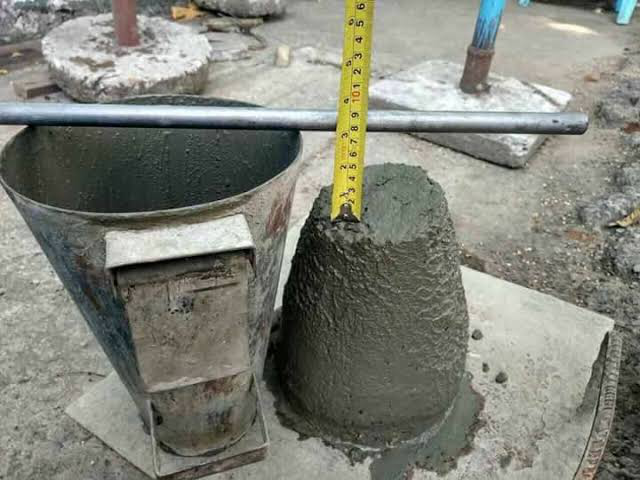

In [1]:
from IPython.display import display
from PIL import Image


path=r".\datasets\slump-image.jpg"
display(Image.open(path))

In [4]:
# Reading the data
data = pd.read_csv(r".\datasets\slump.v1.csv")

In [5]:
data.head() # Now let's take a loot into our data

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [5]:
data.info() # Checking the info to get more ideas about our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
No                                    103 non-null int64
Cement                                103 non-null float64
Slag                                  103 non-null float64
Fly ash                               103 non-null float64
Water                                 103 non-null float64
SP                                    103 non-null float64
Coarse Aggr.                          103 non-null float64
Fine Aggr.                            103 non-null float64
SLUMP(cm)                             103 non-null float64
FLOW(cm)                              103 non-null float64
Compressive Strength (28-day)(Mpa)    103 non-null float64
dtypes: float64(10), int64(1)
memory usage: 9.0 KB


In [6]:
# Cool, the data is clear, however the column "No" is useless for us. Dropping it
data = data.drop(columns = "No")
data.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


Attribute Information:

Input variables (7)(component kg in one m3 concrete):
Cement,
Slag,
Fly ash,
Water,
SP,
Coarse Aggr.,
Fine Aggr.,

Output variables (3):
SLUMP (cm),
FLOW (cm),
28-day Compressive Strength (Mpa)

In [7]:
# Changing column names just in case
data.rename(columns={"SLUMP(cm)":"SLUMPcm", "FLOW(cm)":"FLOWcm", "Compressive Strength (28-day)(Mpa)":"CS28Mpa"}, inplace=True)

In [8]:
X = data[["Cement", "Slag", "Fly ash", "Water", "SP", "Coarse Aggr.", "Fine Aggr."]]

In [9]:
y = data[["SLUMPcm", "FLOWcm", "CS28Mpa"]]

In [10]:
y

,SLUMPcm,FLOWcm,CS28Mpa
0,23.0,62.0,34.99
1,0.0,20.0,41.14
2,1.0,20.0,41.81
3,3.0,21.5,42.08
4,20.0,64.0,26.82
...,...,...,...
98,0.0,20.0,49.97
99,2.0,20.0,50.23
100,0.0,20.0,50.50
101,27.5,67.0,49.17


In [11]:
data.isnull().any() #Double checking if there is null data

Cement          False
Slag            False
Fly ash         False
Water           False
SP              False
Coarse Aggr.    False
Fine Aggr.      False
SLUMPcm         False
FLOWcm          False
CS28Mpa         False
dtype: bool

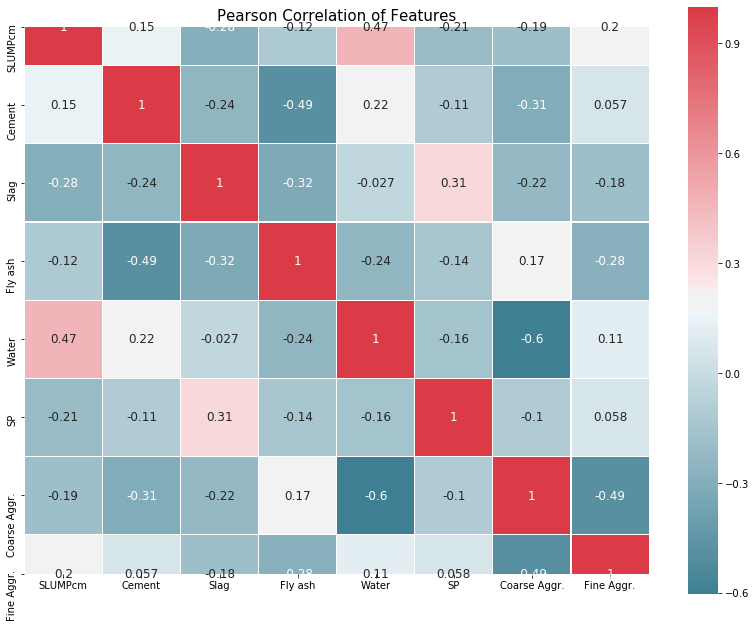

In [12]:
#correlation heatmap of dataset
heatmapdata = data[["SLUMPcm","Cement", "Slag", "Fly ash", "Water", "SP", "Coarse Aggr.", "Fine Aggr."]]
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(heatmapdata)

In [13]:
# We can see from the correlation that water is the most correlated feature with Slump

In [14]:
#Splitting the data into train(%80) and test(%20) sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

### Modelling

In [15]:
lr = LinearRegression() #Using Linear Regression
lr.fit(X_train, y_train) #Fitting the data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lrpred = lr.predict(X_test) #Making Prediction

In [17]:
# We want a model which has the highest accuracy score and the lowest RMSE
RMSE = sqrt(mean_squared_error(y_true=y_test, y_pred=lrpred))
print(RMSE)

10.75602000770209


In [18]:
dtr = DecisionTreeRegressor(max_depth=50)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=50, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [19]:
dtrpred = dtr.predict(X_test)

In [20]:
# Checking the RMSE of Decision Tree Regressor
RMSE = sqrt(mean_squared_error(y_true=y_test, y_pred=dtrpred))
print(RMSE)

11.337353628673108


In [21]:
# Linear Regression did better job. 
print ("Linear Regression Score = " + str(lr.score(X,y)))
print ("Decision Tree Score = " + str(dtr.score(X,y)))

Linear Regression Score = 0.5031044724275593
Decision Tree Score = 0.822263838612378


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


#### Decision Tree did a good job with %82.2 score!

### Time for some Deep Dive

In [22]:
y = data[["SLUMPcm"]]

In [23]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [24]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [25]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))                                
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

In [26]:
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)                             

In [27]:
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

In [28]:
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [29]:
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [30]:
print('STARTING TO FIT')

print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))

print('elasticnet')
elastic_model_full_data = elasticnet.fit(X, y)

print('Lasso')
lasso_model_full_data = lasso.fit(X, y)

print('Ridge')
ridge_model_full_data = ridge.fit(X, y)

print('Svr')
svr_model_full_data = svr.fit(X, y)

print('GradientBoosting')
gbr_model_full_data = gbr.fit(X, y)

print('xgboost')
xgb_model_full_data = xgboost.fit(X, y)

print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)

STARTING TO FIT
stack_gen


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` par

[20:43:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:43:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:44:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:44:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:44:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:44:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[20:44:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
elasticnet


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Lasso
Ridge


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d arr

Svr
GradientBoosting
xgboost
[20:45:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
lightgbm


In [31]:
print('RMSLE score on elastic model:' + str(rmsle(y, elastic_model_full_data.predict(X))))
print('RMSLE score on ridge model:' + str(rmsle(y, ridge_model_full_data.predict(X))))
print('RMSLE score on svr model:' + str(rmsle(y, svr_model_full_data.predict(X))))
print('RMSLE score on gbr model:' + str(rmsle(y, gbr_model_full_data.predict(X))))
print('RMSLE score on xgb model:' + str(rmsle(y, xgb_model_full_data.predict(X))))
print('RMSLE score on lgb model:' + str(rmsle(y, lgb_model_full_data.predict(X))))
print('RMSLE score on stack_gen model:' + str(rmsle(y, stack_gen_model.predict(np.array(X)))))

RMSLE score on elastic model:7.163649119183036
RMSLE score on ridge model:7.312028686794281
RMSLE score on svr model:9.321739319655297
RMSLE score on gbr model:1.6747303186334377
RMSLE score on xgb model:0.26351349233545085
RMSLE score on lgb model:4.94101222284814
RMSLE score on stack_gen model:5.259723159860541


In [32]:
xgboost.score(X,y)

0.9990843218616798

In [33]:
# XGBOOST did awesome job. Lets use it for the FLOWcm
y = data[["FLOWcm"]]
print('xgboost')
xgb_model_full_data = xgboost.fit(X, y)
print('RMSLE score on xgb model:' + str(rmsle(y, xgb_model_full_data.predict(X))))
print ("XGBoost score = " + str(xgboost.score(X,y)))          

xgboost
[20:45:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE score on xgb model:0.47572538069225495
XGBoost score = 0.9992595855469915


In [34]:
# Last: XGBoost for SD28Mpa
y = data[["CS28Mpa"]]
print('xgboost')
xgb_model_full_data = xgboost.fit(X, y)
print('RMSLE score on xgb model:' + str(rmsle(y, xgb_model_full_data.predict(X))))
print ("XGBoost score = " + str(xgboost.score(X,y)))  

xgboost
[20:45:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE score on xgb model:0.056864654469490794
XGBoost score = 0.9999468521556774
